In [ ]:
import pandas as pd
import numpy as np
# Direct download link from Google Drive
file_id = "1PbnuTpG9utID_CLa1k88eTZw9tFuMeQq"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(url)
df.head()


,temperature_C,cough_level,chronic_diseases,previous_exposure_complex,age,gender,smoker_status,symptom_duration_days,region_raw,clean_comorbidity_risk,inflammatory_marker,city,pcr_result
0,39.3C,severe,"heart,kidney",NaN,42,male,occasionally,10.0,cairo south,high,NaN,Cairo,positive
1,37.3C,moderate,"asthma,diabetes",clinic visit,74,female,no,1.0,cairo north,high,15.4,Port-Said,negative
2,38.0C,moderate,NaN,NaN,24,male,occasionally,30.0,cairo north,low,13.4,Alexandria,negative
3,38.3C,moderate,"heart,asthma",NaN,49,male,no,11.0,cairo north,medium,12.6,Giza,negative
4,38.4C,moderate,hypertension,NaN,24,male,occasionally,12.0,cairo north,low,0.7,Alexandria,positive


In [ ]:
df.shape

(18236, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18236 entries, 0 to 18235
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   temperature_C              18059 non-null  object 
 1   cough_level                18236 non-null  object 
 2   chronic_diseases           11444 non-null  object 
 3   previous_exposure_complex  5480 non-null   object 
 4   age                        18236 non-null  int64  
 5   gender                     18236 non-null  object 
 6   smoker_status              18236 non-null  object 
 7   symptom_duration_days      14611 non-null  float64
 8   region_raw                 18236 non-null  object 
 9   clean_comorbidity_risk     18236 non-null  object 
 10  inflammatory_marker        15475 non-null  float64
 11  city                       18236 non-null  object 
 12  pcr_result                 18236 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usa

In [ ]:
print(df.isnull().sum())

df.drop_duplicates(inplace=True)

temperature_C                  177
cough_level                      0
chronic_diseases              6792
previous_exposure_complex    12756
age                              0
gender                           0
smoker_status                    0
symptom_duration_days         3625
region_raw                       0
clean_comorbidity_risk           0
inflammatory_marker           2761
city                             0
pcr_result                       0
dtype: int64


In [ ]:
df.describe()

,age,symptom_duration_days,inflammatory_marker
count,18235.000000,14610.000000,15475.000000
mean,42.444475,12.874949,10.021667
std,21.148784,10.352744,5.746692
min,0.000000,0.000000,0.000000
25%,27.000000,5.000000,5.100000
50%,39.000000,11.000000,10.000000
75%,56.000000,17.000000,15.000000
max,100.000000,40.000000,20.000000


pcr_result
negative    13199
positive     5036
Name: count, dtype: int64


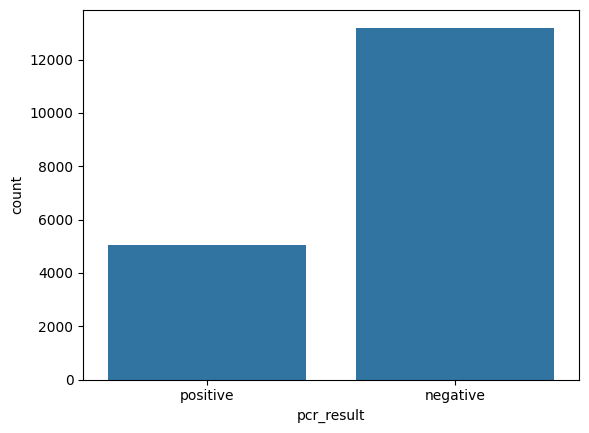

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df['pcr_result'].value_counts())
sns.countplot(x='pcr_result', data=df)
plt.show()

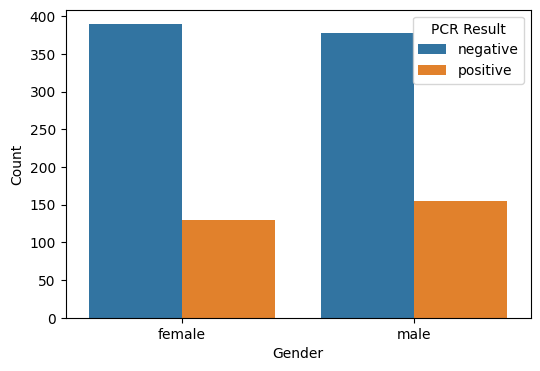

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df[10000:11050], x='gender', hue='pcr_result')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='PCR Result')
plt.show()


/tmp/ipython-input-2773291001.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='PCR Result')


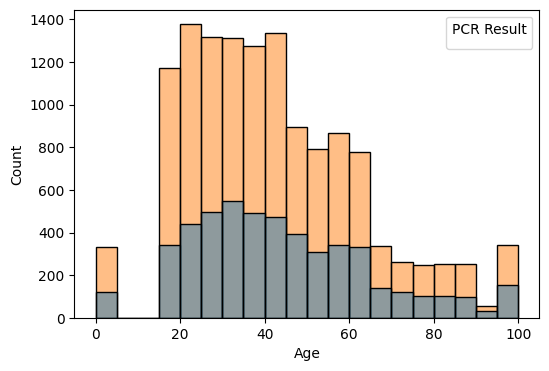

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='age',hue='pcr_result',bins=20,)

plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='PCR Result')
plt.show()


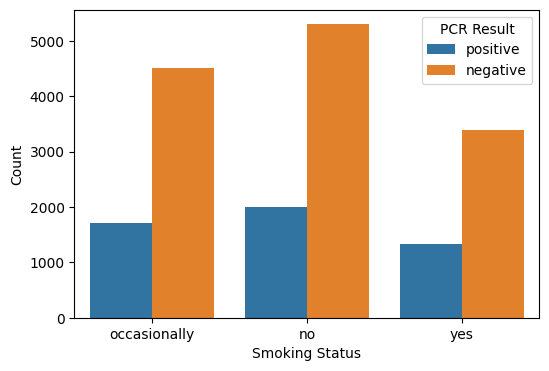

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df,x='smoker_status',hue='pcr_result',)

plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.legend(title='PCR Result')
plt.show()


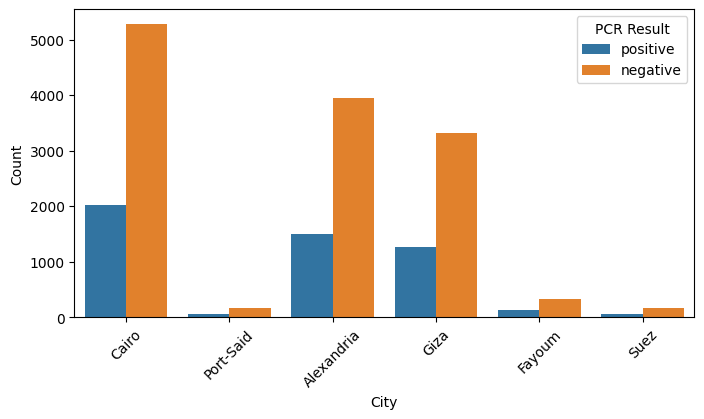

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='city',hue='pcr_result')

plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='PCR Result')
plt.show()


In [ ]:
df.head()

,temperature_C,cough_level,chronic_diseases,previous_exposure_complex,age,gender,smoker_status,symptom_duration_days,region_raw,clean_comorbidity_risk,inflammatory_marker,city,pcr_result
0,39.3C,severe,"heart,kidney",NaN,42,male,occasionally,10.0,cairo south,high,NaN,Cairo,positive
1,37.3C,moderate,"asthma,diabetes",clinic visit,74,female,no,1.0,cairo north,high,15.4,Port-Said,negative
2,38.0C,moderate,NaN,NaN,24,male,occasionally,30.0,cairo north,low,13.4,Alexandria,negative
3,38.3C,moderate,"heart,asthma",NaN,49,male,no,11.0,cairo north,medium,12.6,Giza,negative
4,38.4C,moderate,hypertension,NaN,24,male,occasionally,12.0,cairo north,low,0.7,Alexandria,positive


In [ ]:
df['temperature_C'] = df['temperature_C'].fillna(df['pcr_result'].map({'negative': '37C', 'positive': '39C'}))

df['temperature_C'] = df['temperature_C'].str.replace('C', '')

df['temperature_C'] = pd.to_numeric(df['temperature_C'], errors='coerce')

df['temperature_C']

,temperature_C
0,39.3
1,37.3
2,38.0
3,38.3
4,38.4
...,...
18231,37.2
18232,36.7
18233,38.0
18234,36.6


In [ ]:
df.groupby('pcr_result')['temperature_C'].agg(['min',
                                               'max',
                                               'mean', lambda x: x.mode().iloc[0] if not x.mode().empty else float('nan')])

,min,max,mean,<lambda_0>
pcr_result,,,,
negative,36.5,39.0,37.474104,37.4
positive,36.8,39.9,38.234690,38.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18235 entries, 0 to 18235
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   temperature_C              18235 non-null  float64
 1   cough_level                18235 non-null  object 
 2   chronic_diseases           11444 non-null  object 
 3   previous_exposure_complex  5480 non-null   object 
 4   age                        18235 non-null  int64  
 5   gender                     18235 non-null  object 
 6   smoker_status              18235 non-null  object 
 7   symptom_duration_days      14610 non-null  float64
 8   region_raw                 18235 non-null  object 
 9   clean_comorbidity_risk     18235 non-null  object 
 10  inflammatory_marker        15475 non-null  float64
 11  city                       18235 non-null  object 
 12  pcr_result                 18235 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.

In [ ]:
df['city'].value_counts()

,count
city,
Cairo,7311
Alexandria,5457
Giza,4572
Fayoum,454
Port-Said,221
Suez,220


In [ ]:
cough_transform = {'mild': 1, 'moderate': 2, 'severe': 3}

df['cough_level'] = df['cough_level'].map(cough_transform)

df['cough_level'].value_counts()

,count
cough_level,
2,9094
1,6142
3,2999


In [ ]:
df['chronic_diseases'].unique()

array(['heart,kidney', 'asthma,diabetes', nan, 'heart,asthma',
       'hypertension', 'hypertension,heart', 'diabetes,asthma,heart',
       'diabetes,hypertension,asthma', 'kidney', 'diabetes',
       'hypertension,heart,asthma', 'asthma,kidney',
       'hypertension,kidney,asthma', 'kidney,hypertension,diabetes',
       'heart', 'diabetes,heart', 'kidney,asthma,heart', 'asthma',
       'asthma,hypertension', 'asthma,diabetes,hypertension',
       'hypertension,kidney', 'heart,diabetes',
       'diabetes,hypertension,heart', 'diabetes,asthma',
       'diabetes,hypertension', 'kidney,asthma',
       'asthma,hypertension,kidney', 'diabetes,heart,kidney',
       'heart,kidney,diabetes', 'heart,hypertension,asthma',
       'diabetes,kidney', 'kidney,diabetes', 'asthma,kidney,diabetes',
       'hypertension,diabetes', 'kidney,heart,hypertension',
       'diabetes,asthma,hypertension', 'heart,hypertension,diabetes',
       'diabetes,heart,hypertension', 'hypertension,kidney,diabetes',
      

In [ ]:
diseases = ['asthma', 'diabetes', 'heart', 'hypertension', 'kidney']

def has_disease(text, disease_name):
    if pd.isna(text):
        return 0
    return 1 if disease_name in text else 0

for disease in diseases:
    df[disease] = df['chronic_diseases'].apply(lambda x: has_disease(x, disease))

df[['chronic_diseases'] + diseases].head()

,chronic_diseases,asthma,diabetes,heart,hypertension,kidney
0,"heart,kidney",0,0,1,0,1
1,"asthma,diabetes",1,1,0,0,0
2,NaN,0,0,0,0,0
3,"heart,asthma",1,0,1,0,0
4,hypertension,0,0,0,1,0


In [ ]:
df['chronic_disease_count'] = df[diseases].sum(axis=1)

print(df[['chronic_diseases', 'chronic_disease_count']].head())

  chronic_diseases  chronic_disease_count
0     heart,kidney                      2
1  asthma,diabetes                      2
2              NaN                      0
3     heart,asthma                      2
4     hypertension                      1


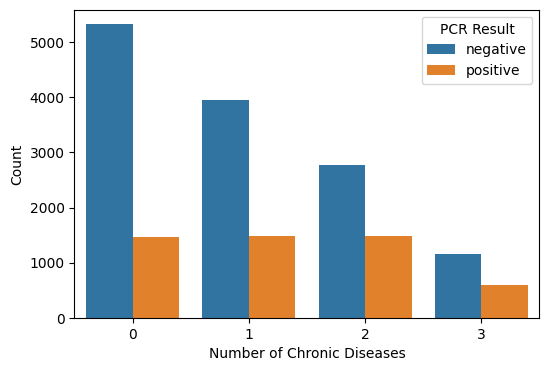

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='chronic_disease_count',hue='pcr_result')

plt.xlabel("Number of Chronic Diseases")
plt.ylabel("Count")
plt.legend(title='PCR Result')
plt.show()


In [ ]:
df.head()

,temperature_C,cough_level,chronic_diseases,previous_exposure_complex,age,gender,smoker_status,symptom_duration_days,region_raw,clean_comorbidity_risk,inflammatory_marker,city,pcr_result,asthma,diabetes,heart,hypertension,kidney,chronic_disease_count
0,39.3,3,"heart,kidney",NaN,42,male,occasionally,10.0,cairo south,high,NaN,Cairo,positive,0,0,1,0,1,2
1,37.3,2,"asthma,diabetes",clinic visit,74,female,no,1.0,cairo north,high,15.4,Port-Said,negative,1,1,0,0,0,2
2,38.0,2,NaN,NaN,24,male,occasionally,30.0,cairo north,low,13.4,Alexandria,negative,0,0,0,0,0,0
3,38.3,2,"heart,asthma",NaN,49,male,no,11.0,cairo north,medium,12.6,Giza,negative,1,0,1,0,0,2
4,38.4,2,hypertension,NaN,24,male,occasionally,12.0,cairo north,low,0.7,Alexandria,positive,0,0,0,1,0,1


In [ ]:
df.drop('previous_exposure_complex' , axis=1 , inplace = True)
df.drop('chronic_diseases' , axis=1 , inplace = True)
df.drop('region_raw' , axis=1 , inplace = True)

In [ ]:
df['gender'] = df['gender'].map({'male': 0, 'female': 1})
df['gender']

,gender
0,0
1,1
2,0
3,0
4,0
...,...
18231,0
18232,0
18233,1
18234,1


In [ ]:
df['smoker_status'] = df['smoker_status'].map({'no': 0, 'occasionally': 1, 'yes': 2})
df['symptom_duration_days'] = df['symptom_duration_days'].fillna(0)
df['clean_comorbidity_risk'] = df['clean_comorbidity_risk'].astype(str).str.strip().map({'low': 1, 'medium': 2, 'high': 3})
df['pcr_result'] = df['pcr_result'].map({'negative': 0, 'positive': 1})

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('pcr_result', axis=1)
y = df['pcr_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_train.head()

,pcr_result
7401,0
7685,1
10864,0
12801,1
7075,0


In [ ]:
# X_train['temperature_C'] = X_train['temperature_C'].fillna(y_train.map({0: 37.4, 1: 38.2}))
# X_test['temperature_C'] = X_test['temperature_C'].fillna(y_test.map({0: 37.3, 1: 37.9}))

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

X_train[['temperature_C']] = imputer.fit_transform(
    X_train[['temperature_C']]
)

X_test[['temperature_C']] = imputer.transform(
    X_test[['temperature_C']]
)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12764 entries, 7401 to 15796
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temperature_C           12764 non-null  float64
 1   cough_level             12764 non-null  int64  
 2   age                     12764 non-null  int64  
 3   gender                  12764 non-null  int64  
 4   smoker_status           12764 non-null  int64  
 5   symptom_duration_days   12764 non-null  float64
 6   clean_comorbidity_risk  12764 non-null  int64  
 7   inflammatory_marker     10852 non-null  float64
 8   city                    12764 non-null  object 
 9   asthma                  12764 non-null  int64  
 10  diabetes                12764 non-null  int64  
 11  heart                   12764 non-null  int64  
 12  hypertension            12764 non-null  int64  
 13  kidney                  12764 non-null  int64  
 14  chronic_disease_count   12764 non-null  

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


numeric_cols = ['age', 'symptom_duration_days', 'inflammatory_marker', 'temperature_C']
categorical_cols = ['city']


num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numeric_cols),
        ('cat', cat_pipeline, categorical_cols)
    ],
    remainder='passthrough'  # keep all other columns
)

In [ ]:
model_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression())
])
model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 0.8473770791445805


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", KNeighborsClassifier())
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7982087369767867


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

model_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", KNeighborsClassifier())
])

param_grid = {
    "model__n_neighbors": [3, 5, 7, 9, 11],        # number of neighbors
    "model__weights": ["uniform", "distance"],     # weight by distance or equal
    "model__metric": ["euclidean", "manhattan"]    # distance metrics
}

grid_search = GridSearchCV(
    model_pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'model__metric': 'euclidean', 'model__n_neighbors': 11, 'model__weights': 'distance'}
Best Cross-Validation Accuracy: 0.8180039587086064


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', GaussianNB())
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.7199780661670627


In [ ]:
from sklearn.svm import SVC

model_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', SVC())
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.8492048985560227


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', SVC())
])

param_grid = {
    'model__C': [0.1, 1, 10],          # regularization parameter
    'model__kernel': ['linear', 'rbf'],# kernel type
    'model__gamma': ['scale', 'auto']  # kernel coefficient for 'rbf'
}


grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)


Best parameters: {'model__C': 10, 'model__gamma': 'auto', 'model__kernel': 'rbf'}
Test Accuracy: 0.852860537378907


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)
prec = precision_score(y_test, y_pred, average='binary')  # use 'macro' or 'weighted' for multiclass
rec = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print("Precision:", rec)
print("Recall:", prec)
print("F1-score:", f1)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Precision: 0.591349257585539
Recall: 0.8419117647058824
F1-score: 0.6947288585513841
Confusion Matrix:
 [[3750  172]
 [ 633  916]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90      3922
           1       0.84      0.59      0.69      1549

    accuracy                           0.85      5471
   macro avg       0.85      0.77      0.80      5471
weighted avg       0.85      0.85      0.84      5471

